Import packages and functions

In [10]:
import sys
import os
sys.path.append('../')

In [11]:
from nustar_scripts.nu_utils import np, plt, fits, os, pd, set_mpl
from nustar_scripts.pulsar_init import ObsList_bright, analysis_path, plot_path, ObsAlias
from nustar_scripts.nu_pyxspec import  scan_containers_ph_ave
from nustar_scripts.nu_pyxspec import  xspec, Model, Fit, Plot, AllData, AllModels, glob

%matplotlib inline

# Latex Tables of spectral  parameters

In [12]:
AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model

def get_ph_ave_res(ObsID: str, model = 'relxilllp'):
    os.chdir(f'{analysis_path}out{ObsID}/products/spe_and_lc/')
    ph_ave_res = scan_containers_ph_ave(model_name=model)
    return ph_ave_res


In [13]:

def val_to_latex(val, lower, upper, frozen = False):

    if type(val)==str:
        if val.startswith('chi2'):
            return val.split(' ', 1)[1]

    if lower==upper==0 and frozen:
        return str(val) +'(fix)'

    err_lo = val - lower
    err_up = upper - val
    k1 = int(np.ceil(-np.log10(err_lo))) #counting the number of digits after the decimal point
    k2 = int(np.ceil(-np.log10(err_up)))
    k = max(k1, k2) #
    if k <= 0:
        k = 0

    my_formatter = f"{{:.{k}f}}"
    str_val = my_formatter.format(val)

    str_err_lo = my_formatter.format(err_lo)
    str_err_up = my_formatter.format(err_up)

    if str_err_lo==str_err_up:
        #return f"{str_val}\\pm{str_err_up}"
        return '$'+str_val + '\\pm' +str_err_up+'$'
    else:
        #return f"{str_val}^{{+{str_err_up}}}_{{-{str_err_lo}}}"
        return '$'+str_val+'^{+'+str_err_up+'}_{-'+str_err_lo+'}$'





Make an appropriate pandas pivot table from the spectral parameters dataframe

In [14]:
ph_ave_cutoffpl = pd.DataFrame()
for ObsID in ObsList_bright[1:4]:
    q = get_ph_ave_res(ObsID)
    ph_ave_cutoffpl = pd.concat((ph_ave_cutoffpl,q))

ph_ave_cutoffpl['latex_str'] = ph_ave_cutoffpl.apply(lambda x: val_to_latex(x['val'], x['error_l'], x['error_u'], frozen=x['frozen']), axis = 1)
ph_ave_cutoffpl_latex = ph_ave_cutoffpl[['latex_str']]


ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.reset_index()
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.pivot(index = ['comp', 'par'], columns = 'ObsID', values = 'latex_str').fillna('-')
sorting = ['constant', 'phabs', 'relxilllp', 'bbodyrad', 'stat', 'flux']
ph_ave_cutoffpl_latex = ph_ave_cutoffpl_latex.loc[sorting, :]
ph_ave_cutoffpl_latex.columns = [ObsAlias[x] for x in ph_ave_cutoffpl_latex.columns]

ph_ave_cutoffpl_latex

II (90302319004)       III (90302319006)  \
comp      par                                                              
constant  factor                 $0.999\pm0.001$         $0.992\pm0.002$   
phabs     nH                            0.8(fix)                0.8(fix)   
relxilllp Afe                           5.0(fix)                5.0(fix)   
          Ecut                      $20.8\pm0.5$            $20.5\pm0.5$   
          Incl                    $18^{+2}_{-3}$          $10^{+3}_{-4}$   
          Rin                           $66\pm6$          $53^{+6}_{-5}$   
          a                             0.0(fix)                0.0(fix)   
          fixReflFrac                   0.0(fix)                0.0(fix)   
          gamma                    $1.27\pm0.03$           $1.32\pm0.03$   
          h                             5.0(fix)                5.0(fix)   
          logxi           $3.47^{+0.04}_{-0.05}$  $3.68^{+0.04}_{-0.03}$   
          norm                     $0.45\pm0.01$           $0.65\pm0.02$   
          refl_frac    $0.184^{+0.011}_{-0.010}$           $0.24\pm0.01$   
          z                             0.0(fix)                0.0(fix)   
bbodyrad  kT                     $1.223\pm0.008$           $1.44\pm0.02$   
          norm                $1112^{+52}_{-56}$       $612^{+91}_{-83}$   
stat      chi2                      2545.53/2309            2290.51/2170   
flux      flux                               ---                     ---   

                             IV (90302319008)  
comp      par                                  
constant  factor              $0.999\pm0.001$  
phabs     nH                         0.8(fix)  
relxilllp Afe                        5.0(fix)  
          Ecut           $17.6^{+0.2}_{-0.3}$  
          Incl                 $16^{+3}_{-2}$  
          Rin                        $51\pm4$  
          a                          0.0(fix)  
          fixReflFrac                0.0(fix)  
          gamma                 $0.77\pm0.02$  
          h                          5.0(fix)  
          logxi        $3.37^{+0.04}_{-0.07}$  
          norm                $0.188\pm0.002$  
          refl_frac           $0.094\pm0.009$  
          z                          0.0(fix)  
bbodyrad  kT                    $1.07\pm0.03$  
          norm              $374^{+26}_{-20}$  
stat      chi2                   3224.41/2735  
flux      flux                            ---

print in in LaTex style

In [15]:
print(ph_ave_cutoffpl_latex.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
     &      &           II (90302319004) &       III (90302319006) &        IV (90302319008) \\
comp & par &                            &                         &                         \\
\midrule
constant & factor &            $0.999\pm0.001$ &         $0.992\pm0.002$ &         $0.999\pm0.001$ \\
phabs & nH &                   0.8(fix) &                0.8(fix) &                0.8(fix) \\
relxilllp & Afe &                   5.0(fix) &                5.0(fix) &                5.0(fix) \\
     & Ecut &               $20.8\pm0.5$ &            $20.5\pm0.5$ &    $17.6^{+0.2}_{-0.3}$ \\
     & Incl &             $18^{+2}_{-3}$ &          $10^{+3}_{-4}$ &          $16^{+3}_{-2}$ \\
     & Rin &                   $66\pm6$ &          $53^{+6}_{-5}$ &                $51\pm4$ \\
     & a &                   0.0(fix) &                0.0(fix) &                0.0(fix) \\
     & fixReflFrac &                   0.0(fix) &                0.0(fix) &                

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_30379/463496331.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ph_ave_cutoffpl_latex.to_latex(escape=False))


# Spectral plots

define a function which plots the spectar data and model (with components)

In [16]:
set_mpl('Paired')
def plot_relf_spe(
    ObsIDs,
    min_sig = 90,
):
    ms, alpha, lw = 4, 0.7, 3


    fig = plt.figure(figsize=(8, 12))
    plotwidth = 4
    rows = len(ObsIDs)+plotwidth
    cols = 1
    ax = plt.subplot2grid((rows, cols), (0, 0), rowspan=plotwidth, colspan=1)
    ax_delchi = [plt.subplot2grid((rows, cols), (i, 0),
                                rowspan=1, colspan=1, sharex=ax) for i in range(plotwidth, rows)]
    plt.subplots_adjust(hspace=0)


    for i, ObsID in enumerate(ObsIDs):
        os.chdir(f"{analysis_path}out{ObsID}/products/spe_and_lc")
        xspec.AllData.clear()
        xspec.AllModels.clear()
        model = 'relxilllp'
        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_{model}.xcm')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"

        label = f'{ObsAlias[ObsID]}'
        

        for gr, m, l in zip([1,2], ['o', 's'], [label, '_'+ label]):
            Plot.device = "/null"
            Plot.setRebin(min_sig, min_sig)
            Plot("eeufs")
            Plot.xAxis = "keV"
            en = np.array(Plot.x(gr))
            data = np.array(Plot.y(gr))
            en_err = np.array(Plot.xErr(gr))
            data_err = np.array(Plot.yErr(gr))

            ax.loglog(en, data, marker = m, lw = 0, alpha = alpha, ms = ms)#, zorder = 10)   
            color =  ax.get_lines()[-1].get_color()         
            ax.errorbar(en, data, data_err, en_err,
                            fmt='none', ecolor=color, alpha=alpha*0.7, label=l)#, zorder = 9)

            Plot("del")
            Plot.xAxis = "keV"
            en = np.array(Plot.x(gr))
            delchi = np.array(Plot.y(gr))
            en_err = np.array(Plot.xErr(gr))
            delchi_err = np.array(Plot.yErr(gr))

            ax_delchi[i].semilogx(en, delchi, marker = m, lw = 0, alpha = alpha, ms = ms, color = color)
            ax_delchi[i].errorbar(en, delchi, delchi_err, en_err,
                            fmt='none', ecolor=color, alpha=alpha*0.7, label=l)#, zorder = 9)
            ax_delchi[i].set_ylabel("$\chi$")
        
        l = ax_delchi[i].legend([ObsAlias[ObsID]] ,loc = 'lower right', fontsize = '15', framealpha = 0.0, handletextpad=-2.0, handlelength=0)
        l.set_zorder(-1)
        for lh in l.legendHandles:
            lh.set_alpha(1)

        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_{model}.xcm_model')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"
        #mo_loaded.relxilllp.refl_frac = "-"+str(refl_fract)
        #mo_loaded.bbodyrad.norm = '0 -1'
        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())
        ax.loglog(en, data, lw = lw, alpha = alpha, ls = '-', color = color)   


        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.refl_frac = "-"+str(refl_fract)
        mo_loaded.bbodyrad.norm = '0 -1'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())
        ax.loglog(en, data, lw = lw, alpha = alpha, ls = ':', color = color)   


        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.refl_frac = '0 -1'
        mo_loaded.bbodyrad.norm = '0 -1'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())

        ax.loglog(en, data, lw = lw, alpha = alpha, ls = '--', color = color)   


        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_{model}.xcm_model')
        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        mo_loaded.relxilllp.norm = '0'

        Plot("eeufs")
        Plot.xAxis = "keV"
        en = np.array(Plot.x())
        data = np.array(Plot.model())

        ax.loglog(en, data, lw = lw, alpha = alpha/2, ls = '-.', color = color)   




        ax.set_xscale("log")
        ax_delchi[-1].set_xlabel("Energy (keV)")


        ax.set_ylabel('$keV^2 (phot\, cm^{-2} s^{-1} keV^{-1})$', fontsize = 14)
        ax.set_xticks([4, 6, 7, 10, 20, 40, 80])
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    
    if ObsList_bright[0] in ObsIDs or ObsList_bright[1] in ObsIDs:
        ax.set_ylim(0.03,3)
    if ObsList_bright[1] in ObsIDs or ObsList_bright[2] in ObsIDs or ObsList_bright[3] in ObsIDs:
        ax.set_ylim(0.6,100)


    return fig, ax





set color cycle so that FPMA and FPMB data are plotted with the same color

In [17]:
set_mpl('Pastel2')
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'r', 'g', 'g', 'b','b', 'violet', 'violet', 'brown', 'brown', 'pink', 'pink'])))

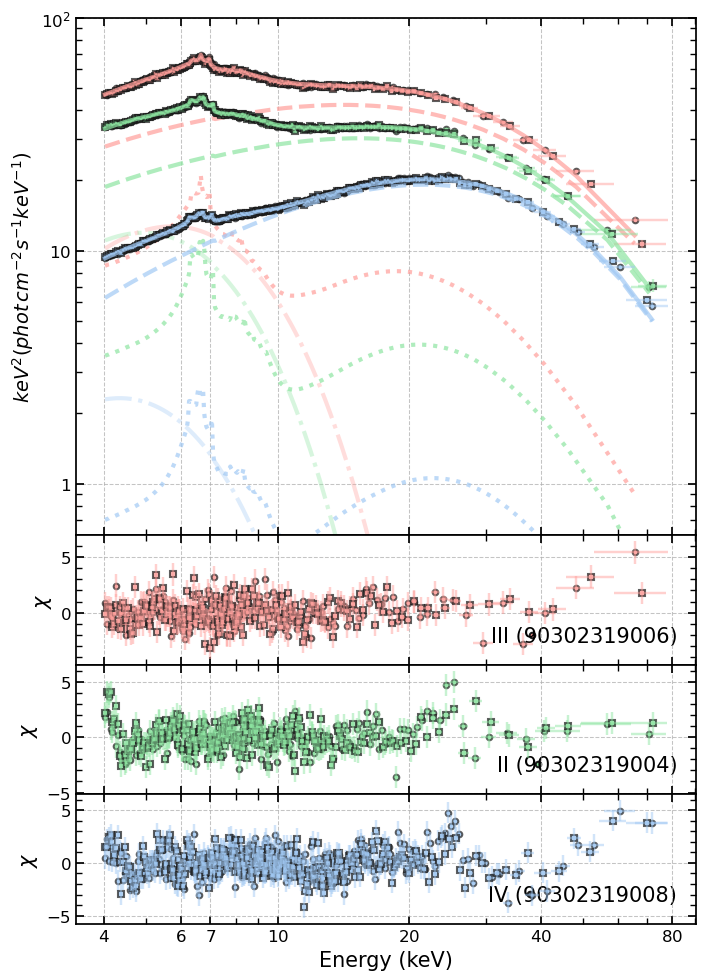

In [18]:
fig, ax = plot_relf_spe([ObsList_bright[2], ObsList_bright[1], ObsList_bright[3]])
fig.savefig(plot_path+ 'ph-ave/spe_high.pdf')
